importing Jupyter notebook from interp_1var.ipynb
importing Jupyter notebook from interp_2vars.ipynb
importing Jupyter notebook from fonctions_1var.ipynb
importing Jupyter notebook from fonctions_2vars.ipynb


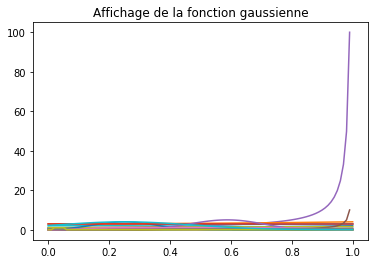

In [1]:
from math import *
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
from interp_1var import *
from interp_2vars import * 
from fonctions_1var import *
from fonctions_2vars import *

## Schéma advection-diffusion

In [2]:
def u0(x,h) :
    x = x*h
    return np.cos(pi * x)**2 +1 

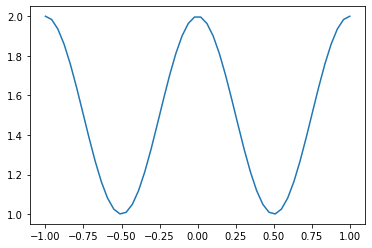

In [3]:
x = np.linspace(-1,1,50)
h = 1 
plt.figure()
plt.plot(x,u0(x,h))
plt.show()

In [4]:
def schema_diffusion (u0, dt, dx, T) :  
    u = np.copy(u0)
    t = 0
    i = 0
    while t<T :
        u_j_1 = np.concatenate(([u[-1]], u[:-1]))
        k = dt/dx
        u = u - k*(u- u_j_1)
        
        t += dt
        i +=1
    return u

Nombre d'itérations finales :  2


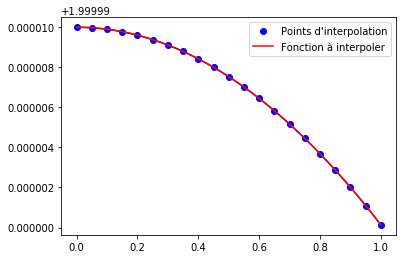

In [5]:
p = 20
h = 0.001
poln, xn, err, pol, x, nit = interpol(p ,h, u0, 1e-12)
polynom_display(xn, poln, x, pol, h, u0)

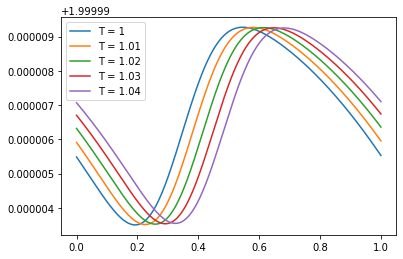

In [6]:
dt = h/20
T = [1,1.01,1.02,1.03,1.04]

plt.figure()
for t in T : 
    u_new_pol = schema_diffusion(pol, dt,h,t)
    plt.plot(x,u_new_pol, label = "T = "+str(t))
plt.legend()
plt.show()

## Diminution du nombre d'itération en prenant en transitoire ? 

In [7]:
# ini = True, reprise de l'init à Tchebytchev à chaque fois
# ini = False, reprise du dernier polynome pour 
def diffusion(dt, Tmax, ini, p, h, function) :
    t=0
    nb_total = 0
    plt.figure()
    while t<Tmax : 
        t+=dt 
        if ini or t == dt :
            poln, xn, err, pol, x, nit = interpol_t(p ,h, function,t, 1e-12)
        else : 
            print(np.shape(poln))
            poln, xn, error, pol, x, nit = interpol_pts_init_t(p, h, function, poln,t)
        nb_total += nit
        plt.plot(xn,poln)
    plt.show()
    return nb_total

##### Sinus diffusant

In [8]:
def sin_t(x, h , t) : 
    x=x*h
    return ( np.sin(x - 10* t) + 2 )

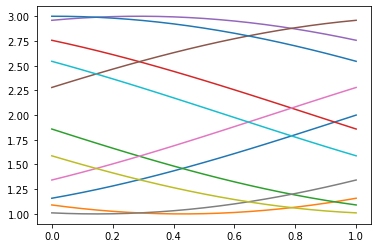

Nombre d'itérations totales =  125


In [9]:
N = diffusion(0.1,1,True, 20, 1, sin_t )
print("Nombre d'itérations totales = ", N)

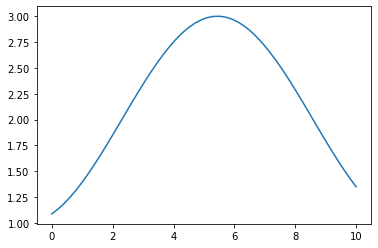

In [10]:
x = np.linspace(0,10,50)
t=2
h= 0.5
plt.figure()
plt.plot(x, sin_t(x,h,t))
plt.show()

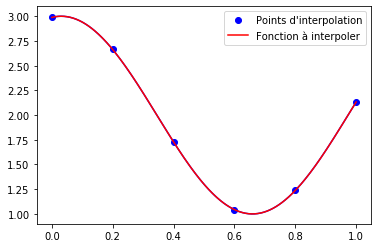

In [11]:
p = 5
h = 5
T = 3

poln, xn, error, pol, x, nit = interpol_t(p, h, sin_t, T)
polynom_display_t(xn,poln,x ,pol,h,sin_t,T)


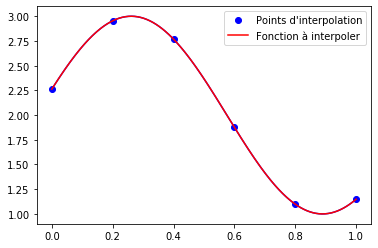

In [12]:
p = 5
h = 5
T = 5

poln, xn, error, pol, x, nit = interpol_t(p, h, sin_t, T)
polynom_display_t(xn,poln,x ,pol,h,sin_t,T)


Même nombre d'itération donc pas d'amélioration même si l'on met une valeur transitoire entre les deux

##### Gaussienne diffusante 

In [ ]:
def gauss2_t(x, h, t) : 
    return np.exp ((-(x-0.5)**2)/(0.01*t))

In [ ]:
x = np.linspace(0,1,100)
h = 0.5
T = np.linspace(0.1,1,20)
for t in T : 
    plt.plot(x,gauss2_t(x,h,t))

In [ ]:
p = 40
h = 0.5
T = 0.1

poln, xn, error, pol, x, nit = interpol_t(p, h, gauss2_t, T)
polynom_display_t(xn,poln,x ,pol,h,gauss2_t,T)


In [ ]:
p = 45
h = 0.5
T = 0.6

poln, xn, error, pol, x, nit = interpol_t(p, h, gauss2_t, T)
polynom_display_t(xn,poln,x ,pol,h,gauss2_t,T)


Encore une fois même nombre d'itération finale, docn pas d'amélioration possible.